<a href="https://colab.research.google.com/github/badrinarayanan02/deep_learning/blob/main/2348507_DLLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multilayer Perceptrons**

Working for a financial institution that is concerned about fraudulent transactions on its
credit card platform. Task is to develop a predictive model using Multilayer Perceptrons
(MLPs) with Keras/TensorFlow to detect fraudulent transactions based on transaction features.

Design an MLP model architecture using Keras/TensorFlow to classify credit card transactions as fraudulent or not. Consider appropriate activation functions, number of layers, and neurons in each layer.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [2]:
trans_data = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
trans_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
trans_data.shape

(1296675, 23)

In [4]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
trans_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

**Inference:** There is no null values in the dataset

In [6]:
trans_data['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

**Visualization**

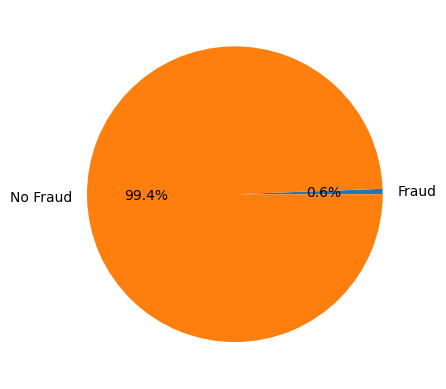

In [7]:
labels = 'Fraud', 'No Fraud'
sizes = [trans_data['is_fraud'].value_counts()[1], trans_data['is_fraud'].value_counts()[0]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

**Inference:** The count of not fraud is more than fraud transactions

In [8]:
trans_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Distribution of fraud vs non fraud before smoting

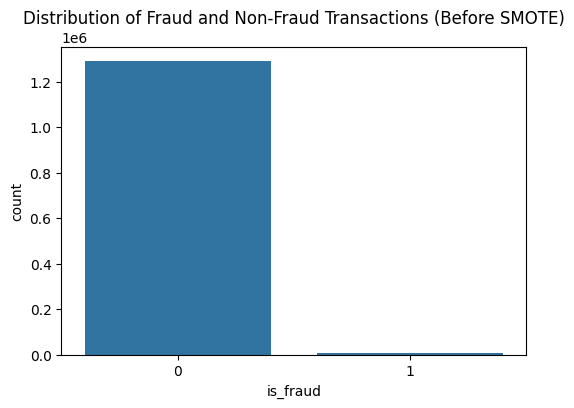

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=trans_data)
plt.title('Distribution of Fraud and Non-Fraud Transactions (Before SMOTE)')
plt.show()

Specified Features

In [67]:
selectedFeatures = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'trans_num', 'unix_time', 'is_fraud']
df = trans_data[selectedFeatures]

In [68]:
df.drop(columns=['trans_date_trans_time','trans_num'], inplace=True)

<ipython-input-68-15a42f1d8a53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['trans_date_trans_time','trans_num'], inplace=True)


Separatinng features and target variable

In [69]:
X = df.drop('is_fraud',axis = 1)
y = df['is_fraud']

In [71]:
non_numeric_features = X.select_dtypes(include=['object']).columns

# **Data Preprocessing**

In [70]:
numericalFeatures = ['amt','unix_time','cc_num']
categoricalFeatures = ['merchant', 'category']

Defining transformers to scale and encode the data

In [72]:
numericalTransformer = StandardScaler()
categoricalTransformer = OneHotEncoder()

Combining transformers

In [73]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numericalTransformer,numericalFeatures),
        ('cat',categoricalTransformer,categoricalFeatures)
    ]
)

Splitting the data

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Performing Smoting to solve the class imbalance issue

In [75]:
smote = SMOTE(random_state=42)
X_train_numeric, _ = smote.fit_resample(X_train[numericalFeatures], y_train)

In [76]:
X_train_resampled = pd.concat([pd.DataFrame(X_train_numeric, columns=numericalFeatures), X_train[non_numeric_features]], axis=1)
y_train_resampled = _

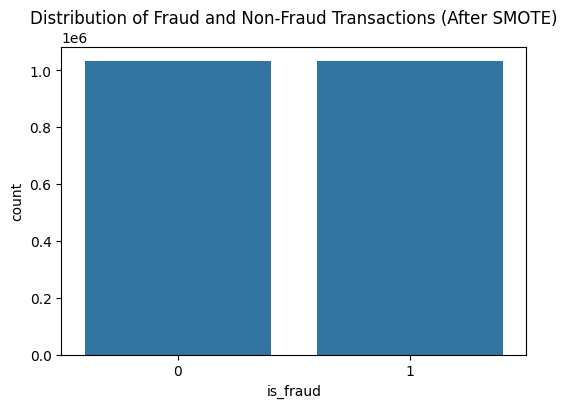

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Fraud and Non-Fraud Transactions (After SMOTE)')
plt.show()

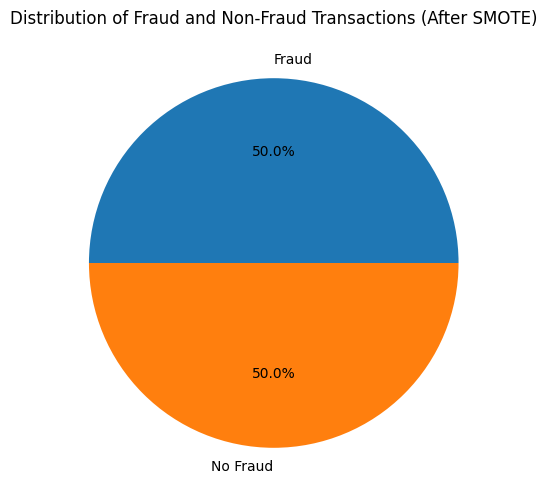

In [78]:
sizes_resampled = [sum(y_train_resampled == 1), sum(y_train_resampled == 0)]

plt.figure(figsize=(6, 6))
plt.pie(sizes_resampled, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Fraud and Non-Fraud Transactions (After SMOTE)')
plt.show()

**Inference:** Now the class imbalance issue is solved by using SMOTE technique.

# **MLP Model Architecture**

In [79]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

Compiling the model

In [80]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
model.fit(preprocessor.fit_transform(X_train_resampled), y_train_resampled, epochs=10, batch_size=64)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 712)
